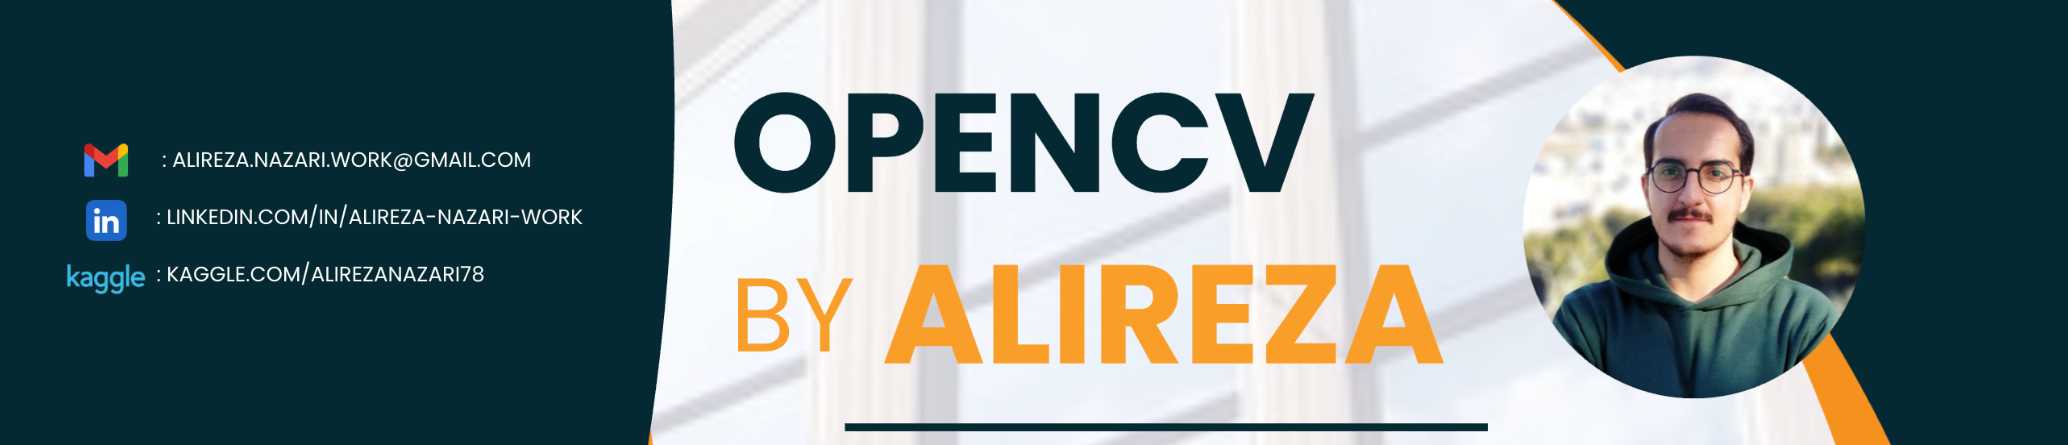

## 29 - Image segmentation using morphological operations

If we want to extract or define something from the rest of the image, eg. detecting an object from a background, we can break the image up into segments in which we can do more processing on. This is typically called Segmentation. Morphological operations are some simple operations based on the image shape. It is normally performed on binary images. Two basic morphological operators are Dilation and Erosion. In order to proceed on we'll use OTSU's threshold algorithm, which removes over-segmented results due to noise or any other irregularities in the image, and implement it with OpenCV. 

Approach:

Label the region which we are sure of being the foreground or object with one color (or intensity), label the region which we are sure of being background or non-object with another color.

Finally, the region for which we are not sure of anything, label it with 0. That is our marker. Then apply the watershed algorithm.
Then our marker will be updated with the labels we gave, and the boundaries of objects will have a value of -1.

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

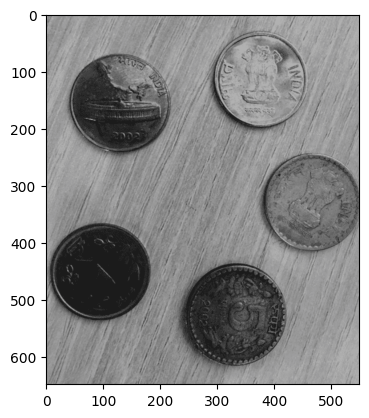

In [3]:
image = cv2.imread("Images/coin.png")
plt.imshow(image)

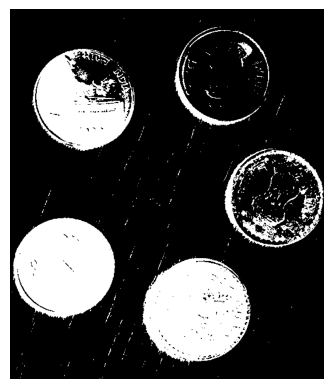

In [ ]:
image = cv2.imread("Images/coin.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

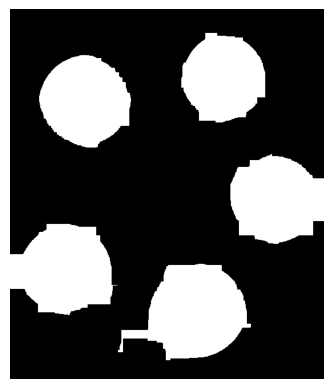

In [5]:
kernel = np.ones((9, 9), np.uint8)

closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE,
                            kernel, iterations = 3)

bg = cv2.dilate(closing, kernel, iterations = 2)

contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
result = np.zeros(gray.shape, dtype=np.uint8)
for contour in contours:
    if cv2.contourArea(contour) > 1000:
        cv2.fillPoly(result, [contour], 255)

kernel_open = np.ones((6, 6), np.uint8)
opened_result = cv2.morphologyEx(result, cv2.MORPH_OPEN, kernel_open, iterations=2)

kernel_erode = np.ones((9, 9), np.uint8)
final_result = cv2.erode(opened_result, kernel_erode, iterations=2)

plt.imshow(final_result, cmap='gray')
plt.axis('off')
plt.show()

From the output image, we can see that the small noise in the foreground has been removed using the closing operation, leaving only the main objects. The dilation step helps to make the background clearer. By adjusting the settings in each step, we can improve the image even more and make the objects stand out better.

### Source :

https://www.geeksforgeeks.org/python/opencv-python-tutorial/